## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    # 建立一個有三層隱藏層之神經網路
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model1 = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
optimizer_sgd = keras.optimizers.SGD()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer_sgd)

In [6]:
model.fit(x_train, y_train, epochs=500, batch_size=256, validation_data=(x_test, y_test), shuffle=True)
model1.fit(x_train, y_train, epochs=500, batch_size=256, validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/500





50000/50000 [==============================] - 15s 300us/step - loss: 1.9748 - acc: 0.2915 - val_loss: 1.7892 - val_acc: 0.3647
Epoch 2/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.7421 - acc: 0.3802 - val_loss: 1.6957 - val_acc: 0.3934
Epoch 3/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.6308 - acc: 0.4193 - val_loss: 1.6346 - val_acc: 0.4039
Epoch 4/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.5608 - acc: 0.4430 - val_loss: 1.5307 - val_acc: 0.4600
Epoch 5/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.5089 - acc: 0.4614 - val_loss: 1.4853 - val_acc: 0.4726
Epoch 6/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.4675 - acc: 0.4764 - val_loss: 1.5348 - val_acc: 0.4456
Epoch 7/500
5

50000/50000 [==============================] - 6s 128us/step - loss: 0.6983 - acc: 0.7488 - val_loss: 1.6791 - val_acc: 0.5207
Epoch 47/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.6851 - acc: 0.7534 - val_loss: 1.6837 - val_acc: 0.5244
Epoch 48/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.6785 - acc: 0.7589 - val_loss: 1.7126 - val_acc: 0.5212
Epoch 49/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.6656 - acc: 0.7602 - val_loss: 1.7768 - val_acc: 0.5106
Epoch 50/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.6537 - acc: 0.7639 - val_loss: 1.7659 - val_acc: 0.5106
Epoch 51/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.6354 - acc: 0.7725 - val_loss: 1.8458 - val_acc: 0.5144
Epoch 52/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.6203 - acc: 0.7765 - val_loss: 1.7980 - val_acc: 0.5220
Epoch 53/500
50000/50000 [=======

50000/50000 [==============================] - 7s 132us/step - loss: 0.2805 - acc: 0.9003 - val_loss: 3.1642 - val_acc: 0.5031
Epoch 105/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.2861 - acc: 0.8974 - val_loss: 3.1680 - val_acc: 0.4959
Epoch 106/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.2970 - acc: 0.8923 - val_loss: 3.1514 - val_acc: 0.5002
Epoch 107/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.2681 - acc: 0.9025 - val_loss: 3.2700 - val_acc: 0.4984
Epoch 108/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.2744 - acc: 0.9002 - val_loss: 3.1844 - val_acc: 0.5021
Epoch 109/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.2772 - acc: 0.8992 - val_loss: 3.2504 - val_acc: 0.4957
Epoch 110/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.2773 - acc: 0.8991 - val_loss: 3.2716 - val_acc: 0.5024
Epoch 111/500
50000/50000 [

50000/50000 [==============================] - 7s 145us/step - loss: 0.2007 - acc: 0.9276 - val_loss: 3.9932 - val_acc: 0.4973
Epoch 163/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.1606 - acc: 0.9437 - val_loss: 4.0607 - val_acc: 0.4934
Epoch 164/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.2159 - acc: 0.9243 - val_loss: 4.1508 - val_acc: 0.4960
Epoch 165/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.2124 - acc: 0.9239 - val_loss: 4.1238 - val_acc: 0.4977
Epoch 166/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1786 - acc: 0.9359 - val_loss: 4.0649 - val_acc: 0.5022
Epoch 167/500
50000/50000 [==============================] - 8s 167us/step - loss: 0.1801 - acc: 0.9361 - val_loss: 4.0204 - val_acc: 0.4908
Epoch 168/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.1862 - acc: 0.9343 - val_loss: 4.0650 - val_acc: 0.4935
Epoch 169/500
50000/50000 [

50000/50000 [==============================] - 7s 150us/step - loss: 0.0830 - acc: 0.9711 - val_loss: 4.5418 - val_acc: 0.5021
Epoch 221/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.1814 - acc: 0.9385 - val_loss: 4.5582 - val_acc: 0.4892
Epoch 222/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.2475 - acc: 0.9198 - val_loss: 4.5185 - val_acc: 0.4873
Epoch 223/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.1361 - acc: 0.9524 - val_loss: 4.5433 - val_acc: 0.4946
Epoch 224/500
50000/50000 [==============================] - 10s 191us/step - loss: 0.1223 - acc: 0.9562 - val_loss: 4.6227 - val_acc: 0.4909
Epoch 225/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.1189 - acc: 0.9582 - val_loss: 4.5705 - val_acc: 0.4922
Epoch 226/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.1106 - acc: 0.9615 - val_loss: 4.5024 - val_acc: 0.5033
Epoch 227/500
50000/5000

50000/50000 [==============================] - 7s 131us/step - loss: 0.1023 - acc: 0.9639 - val_loss: 4.8287 - val_acc: 0.4980
Epoch 278/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.0734 - acc: 0.9740 - val_loss: 4.8101 - val_acc: 0.4945
Epoch 279/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.1741 - acc: 0.9418 - val_loss: 4.8758 - val_acc: 0.4866
Epoch 280/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1762 - acc: 0.9425 - val_loss: 4.7958 - val_acc: 0.4933
Epoch 281/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0838 - acc: 0.9711 - val_loss: 4.8289 - val_acc: 0.4961
Epoch 282/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.0972 - acc: 0.9655 - val_loss: 4.8984 - val_acc: 0.4910
Epoch 283/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0833 - acc: 0.9711 - val_loss: 4.9196 - val_acc: 0.4919
Epoch 284/500
50000/50000 [

50000/50000 [==============================] - 7s 134us/step - loss: 0.0840 - acc: 0.9712 - val_loss: 5.0080 - val_acc: 0.4991
Epoch 336/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.0783 - acc: 0.9729 - val_loss: 5.0942 - val_acc: 0.4961
Epoch 337/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.0668 - acc: 0.9765 - val_loss: 4.9684 - val_acc: 0.4928
Epoch 338/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.1030 - acc: 0.9650 - val_loss: 5.0338 - val_acc: 0.4973
Epoch 339/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.1342 - acc: 0.9567 - val_loss: 5.0063 - val_acc: 0.4953
Epoch 340/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.1279 - acc: 0.9574 - val_loss: 5.0827 - val_acc: 0.4931
Epoch 341/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0868 - acc: 0.9710 - val_loss: 4.9996 - val_acc: 0.4949
Epoch 342/500
50000/50000 [

50000/50000 [==============================] - 7s 141us/step - loss: 0.0294 - acc: 0.9902 - val_loss: 5.1997 - val_acc: 0.4935
Epoch 394/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0263 - acc: 0.9912 - val_loss: 5.1644 - val_acc: 0.4913
Epoch 395/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.0634 - acc: 0.9795 - val_loss: 5.2926 - val_acc: 0.4796
Epoch 396/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.1925 - acc: 0.9424 - val_loss: 5.1270 - val_acc: 0.4928
Epoch 397/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.2260 - acc: 0.9335 - val_loss: 5.1284 - val_acc: 0.4847
Epoch 398/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0821 - acc: 0.9723 - val_loss: 5.1209 - val_acc: 0.4925
Epoch 399/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0348 - acc: 0.9887 - val_loss: 5.1320 - val_acc: 0.5016
Epoch 400/500
50000/50000 [

50000/50000 [==============================] - 8s 162us/step - loss: 0.0382 - acc: 0.9888 - val_loss: 4.9044 - val_acc: 0.5025
Epoch 452/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.0221 - acc: 0.9939 - val_loss: 4.9299 - val_acc: 0.5043
Epoch 453/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0136 - acc: 0.9967 - val_loss: 4.9832 - val_acc: 0.5052
Epoch 454/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.0071 - acc: 0.9993 - val_loss: 4.9851 - val_acc: 0.5058
Epoch 455/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0056 - acc: 0.9996 - val_loss: 5.0069 - val_acc: 0.5045
Epoch 456/500
50000/50000 [==============================] - 8s 165us/step - loss: 0.0054 - acc: 0.9995 - val_loss: 5.0603 - val_acc: 0.5031
Epoch 457/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.0089 - acc: 0.9984 - val_loss: 5.0873 - val_acc: 0.4959
Epoch 458/500
50000/50000 

Epoch 9/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.6237 - acc: 0.4286 - val_loss: 1.6770 - val_acc: 0.4069
Epoch 10/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.6036 - acc: 0.4359 - val_loss: 1.6562 - val_acc: 0.4178
Epoch 11/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.5860 - acc: 0.4452 - val_loss: 1.6498 - val_acc: 0.4204
Epoch 12/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.5672 - acc: 0.4505 - val_loss: 1.6538 - val_acc: 0.4072
Epoch 13/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.5522 - acc: 0.4545 - val_loss: 1.6507 - val_acc: 0.4107
Epoch 14/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5375 - acc: 0.4617 - val_loss: 1.5785 - val_acc: 0.4463
Epoch 15/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.5222 - acc: 0.4657 - val_loss: 1.6820 - val_acc: 0.4027
Epoch 16/500
50000/50000 

50000/50000 [==============================] - 5s 95us/step - loss: 1.1122 - acc: 0.6113 - val_loss: 1.5144 - val_acc: 0.4758
Epoch 68/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.1106 - acc: 0.6104 - val_loss: 1.3543 - val_acc: 0.5266
Epoch 69/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1031 - acc: 0.6133 - val_loss: 1.4376 - val_acc: 0.4917
Epoch 70/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0955 - acc: 0.6153 - val_loss: 1.5091 - val_acc: 0.4698
Epoch 71/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.0999 - acc: 0.6162 - val_loss: 1.4606 - val_acc: 0.4933
Epoch 72/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.0874 - acc: 0.6208 - val_loss: 1.4015 - val_acc: 0.5113
Epoch 73/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0766 - acc: 0.6228 - val_loss: 1.3695 - val_acc: 0.5159
Epoch 74/500
50000/50000 [=============

50000/50000 [==============================] - 5s 96us/step - loss: 0.8103 - acc: 0.7209 - val_loss: 1.5515 - val_acc: 0.4907
Epoch 126/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.8087 - acc: 0.7167 - val_loss: 1.4664 - val_acc: 0.5266
Epoch 127/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.7948 - acc: 0.7252 - val_loss: 1.4122 - val_acc: 0.5297
Epoch 128/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.8016 - acc: 0.7199 - val_loss: 1.4157 - val_acc: 0.5270
Epoch 129/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.7958 - acc: 0.7245 - val_loss: 1.3995 - val_acc: 0.5364
Epoch 130/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.7797 - acc: 0.7286 - val_loss: 1.6848 - val_acc: 0.4754
Epoch 131/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.7838 - acc: 0.7264 - val_loss: 1.4164 - val_acc: 0.5317
Epoch 132/500
50000/50000 [=====

50000/50000 [==============================] - 5s 96us/step - loss: 0.5292 - acc: 0.8210 - val_loss: 1.6497 - val_acc: 0.5311
Epoch 184/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.5161 - acc: 0.8264 - val_loss: 1.6302 - val_acc: 0.5278
Epoch 185/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.5205 - acc: 0.8239 - val_loss: 1.6451 - val_acc: 0.5195
Epoch 186/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.5095 - acc: 0.8280 - val_loss: 1.6182 - val_acc: 0.5343
Epoch 187/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.4975 - acc: 0.8330 - val_loss: 1.8243 - val_acc: 0.5023
Epoch 188/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.5215 - acc: 0.8227 - val_loss: 1.6517 - val_acc: 0.5294
Epoch 189/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.5013 - acc: 0.8304 - val_loss: 1.6262 - val_acc: 0.5305
Epoch 190/500
50000/50000 [======

50000/50000 [==============================] - 6s 116us/step - loss: 0.2943 - acc: 0.9104 - val_loss: 2.0334 - val_acc: 0.5226
Epoch 242/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.2770 - acc: 0.9175 - val_loss: 2.1631 - val_acc: 0.5033
Epoch 243/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.2694 - acc: 0.9182 - val_loss: 2.0614 - val_acc: 0.5082
Epoch 244/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2759 - acc: 0.9157 - val_loss: 2.9819 - val_acc: 0.4211
Epoch 245/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2702 - acc: 0.9214 - val_loss: 1.9887 - val_acc: 0.5307
Epoch 246/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2671 - acc: 0.9196 - val_loss: 2.2315 - val_acc: 0.4929
Epoch 247/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.2793 - acc: 0.9154 - val_loss: 1.9819 - val_acc: 0.5335
Epoch 248/500
50000/50000 [====

50000/50000 [==============================] - 5s 102us/step - loss: 0.1484 - acc: 0.9640 - val_loss: 2.2743 - val_acc: 0.5418
Epoch 300/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.0903 - acc: 0.9825 - val_loss: 2.3184 - val_acc: 0.5377
Epoch 301/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.0848 - acc: 0.9841 - val_loss: 2.4502 - val_acc: 0.5267
Epoch 302/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.0779 - acc: 0.9866 - val_loss: 2.3314 - val_acc: 0.5396
Epoch 303/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0986 - acc: 0.9800 - val_loss: 2.3145 - val_acc: 0.5405
Epoch 304/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2559 - acc: 0.9466 - val_loss: 2.3746 - val_acc: 0.4966
Epoch 305/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2185 - acc: 0.9395 - val_loss: 2.2615 - val_acc: 0.5467
Epoch 306/500
50000/50000 [======

50000/50000 [==============================] - 5s 94us/step - loss: 0.0296 - acc: 0.9977 - val_loss: 2.6251 - val_acc: 0.5413
Epoch 358/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.0290 - acc: 0.9979 - val_loss: 2.5926 - val_acc: 0.5443
Epoch 359/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0277 - acc: 0.9978 - val_loss: 2.6136 - val_acc: 0.5396
Epoch 360/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.0271 - acc: 0.9983 - val_loss: 2.6159 - val_acc: 0.5444
Epoch 361/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0264 - acc: 0.9981 - val_loss: 2.6198 - val_acc: 0.5464
Epoch 362/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.0265 - acc: 0.9980 - val_loss: 2.6502 - val_acc: 0.5392
Epoch 363/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.0257 - acc: 0.9983 - val_loss: 2.6432 - val_acc: 0.5434
Epoch 364/500
50000/50000 [======

50000/50000 [==============================] - 5s 95us/step - loss: 0.0130 - acc: 0.9997 - val_loss: 2.8290 - val_acc: 0.5415
Epoch 416/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0126 - acc: 0.9997 - val_loss: 2.8509 - val_acc: 0.5424
Epoch 417/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0127 - acc: 0.9997 - val_loss: 2.8397 - val_acc: 0.5451
Epoch 418/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0123 - acc: 0.9998 - val_loss: 2.8485 - val_acc: 0.5446
Epoch 419/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0120 - acc: 0.9998 - val_loss: 2.8563 - val_acc: 0.5452
Epoch 420/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0119 - acc: 0.9999 - val_loss: 2.8528 - val_acc: 0.5435
Epoch 421/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0117 - acc: 0.9999 - val_loss: 2.8670 - val_acc: 0.5430
Epoch 422/500
50000/50000 [===

50000/50000 [==============================] - 5s 97us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 3.0339 - val_acc: 0.5435
Epoch 474/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.0419 - val_acc: 0.5437
Epoch 475/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 3.0439 - val_acc: 0.5461
Epoch 476/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.0504 - val_acc: 0.5436
Epoch 477/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.0602 - val_acc: 0.5416
Epoch 478/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 3.0561 - val_acc: 0.5426
Epoch 479/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 3.0580 - val_acc: 0.5448
Epoch 480/500
50000/50000 [====

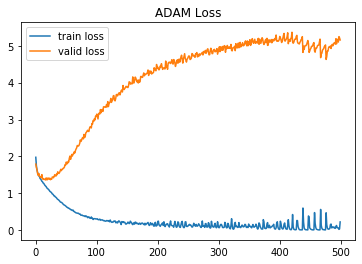

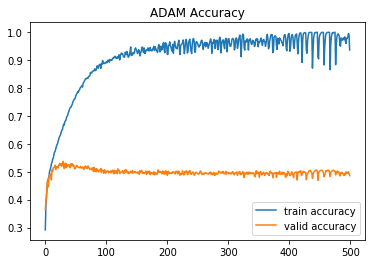

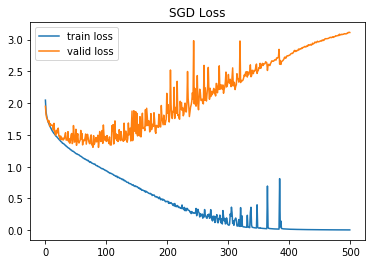

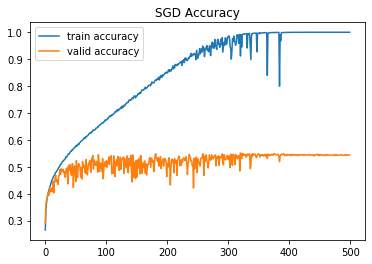

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
train_loss1 = model1.history.history["loss"]
valid_loss1 = model1.history.history["val_loss"]
train_acc1 = model1.history.history["acc"]
valid_acc1 = model1.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("ADAM Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("ADAM Accuracy")
plt.show()

plt.plot(range(len(train_loss1)), train_loss1, label="train loss")
plt.plot(range(len(valid_loss1)), valid_loss1, label="valid loss")
plt.legend()
plt.title("SGD Loss")
plt.show()

plt.plot(range(len(train_acc1)), train_acc1, label="train accuracy")
plt.plot(range(len(valid_acc1)), valid_acc1, label="valid accuracy")
plt.legend()
plt.title("SGD Accuracy")
plt.show()